<a href="https://colab.research.google.com/github/AryanSai/MachineLearning/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors

In [8]:
import pandas as pd

df = pd.read_csv("/content/Customer Churn.csv")

In [9]:
print(df.columns)

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.values
y = df[["Churn"]].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3150, 16) (3150, 1)
(2520, 16) (630, 16) (2520, 1) (630, 1)


In [11]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

The double brackets [[0]] are used to create a 2D array from a 1D array. This is necessary because the predict method expects a 2D array, where each row corresponds to a sample and each column corresponds to a feature.

In [17]:
predictions = knn.predict(X_test[[0]])

print(predictions)

[1 0]


In [18]:
accuracy = knn.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8539682539682539


In [32]:
import numpy as np
train_acc={}
test_acc={}

neighbors = np.arange(1,13)
for nb in neighbors:
    knn = KNeighborsClassifier(n_neighbors=nb)
    knn.fit(X_train, y_train)
    train_acc[nb] = knn.score(X_train, y_train)
    test_acc[nb] = knn.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [33]:
print(neighbors, '\n', train_acc, '\n', test_acc)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9357142857142857, 3: 0.9337301587301587, 4: 0.905952380952381, 5: 0.9023809523809524, 6: 0.8956349206349207, 7: 0.8908730158730159, 8: 0.8833333333333333, 9: 0.8869047619047619, 10: 0.8845238095238095, 11: 0.8857142857142857, 12: 0.8849206349206349} 
 {1: 0.8793650793650793, 2: 0.8714285714285714, 3: 0.8682539682539683, 4: 0.861904761904762, 5: 0.8634920634920635, 6: 0.8539682539682539, 7: 0.8507936507936508, 8: 0.8523809523809524, 9: 0.8476190476190476, 10: 0.8587301587301587, 11: 0.861904761904762, 12: 0.8634920634920635}


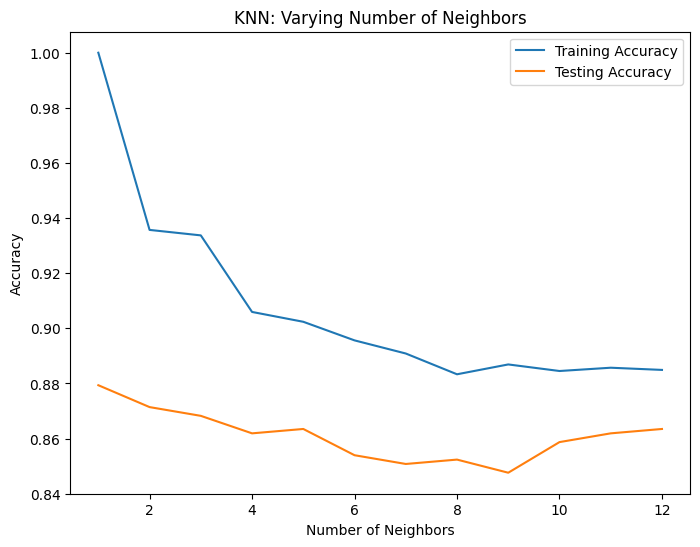

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()